In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
from functools import partial

from datafold.appfold import EDMD
from datafold.dynfold import DMDFull
from datafold.dynfold.transform import TSCPolynomialFeatures, TSCApplyLambdas
from datafold.pcfold import TSCDataFrame

import eigensolvers
import utils
import generators

def get_torus_obs_krylov(initial_state=(0,0), num_col=500):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.two_torus_observable_func, initial_state, num_col)

def get_torus_evo_krylov(initial_state=(0,0), num_col=500):
    return utils.generate_krylov(generators.two_torus_evolution_function, generators.full_state_observable, initial_state, num_col)


In [2]:
x = 1/4*np.pi
y = np.sqrt(30)*np.pi
print(f"pow {pow(np.exp(1j * x), y/x)}")
print(f"exp {np.exp(1j * y)}")

pow (-0.07148693806119702-0.9974415359742317j)
exp (-0.07148693806119348-0.997441535974232j)


In [3]:
U = np.array([[1/2, -1/2, -1/2, 1/2],
              [1/2, 1/2, 1/2, 1/2],
              [1/2, 1/2, -1/2, -1/2],
              [1/2, -1/2, 1/2, -1/2],])
U.T @ U

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [4]:
step = np.sqrt(2) * np.pi
eigenvalues = [1j * np.sin(t * step) + np.cos(t * step)
               for t in range(U.shape[0])]
A = U.T @ np.diag(eigenvalues) @ U
print("eigenvalues")
print(eigenvalues)
print("A")
print(A)

eigenvalues
[(1+0j), (-0.2662553420414156-0.9639025328498773j), (-0.8582161856688175+0.5132883971570619j), (0.7232646301628758+0.6905709773479903j)]
A
[[ 0.14969828+0.05998921j -0.71193404-0.28529628j  0.07880637-0.19665499j
   0.21717405-0.54194048j]
 [-0.71193404-0.28529628j  0.14969828+0.05998921j  0.21717405-0.54194048j
   0.07880637-0.19665499j]
 [ 0.07880637-0.19665499j  0.21717405-0.54194048j  0.14969828+0.05998921j
  -0.71193404-0.28529628j]
 [ 0.21717405-0.54194048j  0.07880637-0.19665499j -0.71193404-0.28529628j
   0.14969828+0.05998921j]]


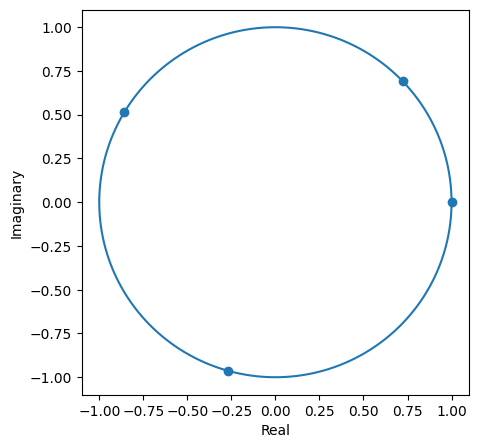

In [5]:
utils.plot_complex_on_unit_circle(eigenvalues)

In [6]:
b = eigensolvers.power_iteration(A, num_iterations=1000)
for l in eigenvalues:
    print(f"eigenvalue: {utils.round_complex_number(l, decimal=2)}, difference {np.around(A@b - l*b)}")

eigenvalue: (1+0j), difference [ 0.-0.j -0.-1.j -0.-0.j -0.-1.j]
eigenvalue: (-0.27-0.96j), difference [ 1.-0.j -1.+0.j  1.-0.j -1.+0.j]
eigenvalue: (-0.86+0.51j), difference [1.-1.j 0.+0.j 1.-1.j 0.+0.j]
eigenvalue: (0.72+0.69j), difference [0.-1.j 0.-1.j 0.-1.j 0.-1.j]


In [7]:
L, V = eigensolvers.apply_arnoldi_iteration(A)

for i in range(V.shape[0]):
    print(f"eigenvalue: {utils.round_complex_number(L[i], decimal=2)}, difference {np.around(A@V[i] - L[i]*V[i])}")

eigenvalue: (-0.27-0.96j), difference [ 0.-0.j -1.-0.j -0.+1.j  1.-0.j]
eigenvalue: (-0.86+0.51j), difference [ 1.-0.j -1.+1.j  0.-0.j  0.+1.j]
eigenvalue: (0.72+0.69j), difference [-0.+0.j -0.+0.j  0.-1.j  0.-1.j]
eigenvalue: (1-0j), difference [-1.+0.j -1.+0.j -0.+0.j -0.+0.j]


In [8]:
v = eigensolvers.inverse_iteration(A, eigenvalues[1])
for l in eigenvalues:
    print(f"eigenvalue: {utils.round_complex_number(l, decimal=2)}, difference {np.around(A@v - l*v)}")

eigenvalue: (1+0j), difference [-1.-0.j -1.-0.j -1.-0.j -1.-0.j]
eigenvalue: (-0.27-0.96j), difference [0.+0.j 0.-0.j 0.+0.j 0.-0.j]
eigenvalue: (-0.86+0.51j), difference [0.-1.j 0.-1.j 0.-1.j 0.-1.j]
eigenvalue: (0.72+0.69j), difference [-0.-1.j -0.-1.j -0.-1.j -0.-1.j]


In [9]:
r = np.exp(1j * 2 * np.pi * np.random.rand())
v = eigensolvers.inverse_iteration(A, r)
print(f"eigenvalue: {utils.round_complex_number(r, decimal=2)}")
for l in eigenvalues:
    print(f"eigenvalue: {utils.round_complex_number(l, decimal=2)}, difference {np.around(A@v - l*v)}")

eigenvalue: (-0.22-0.98j)
eigenvalue: (1+0j), difference [-0.-1.j -0.-1.j -0.-1.j -0.-1.j]
eigenvalue: (-0.27-0.96j), difference [-0.-0.j  0.-0.j  0.-0.j  0.+0.j]
eigenvalue: (-0.86+0.51j), difference [1.-1.j 1.-1.j 1.-1.j 1.-1.j]
eigenvalue: (0.72+0.69j), difference [-0.-1.j -0.-1.j -0.-1.j -0.-1.j]


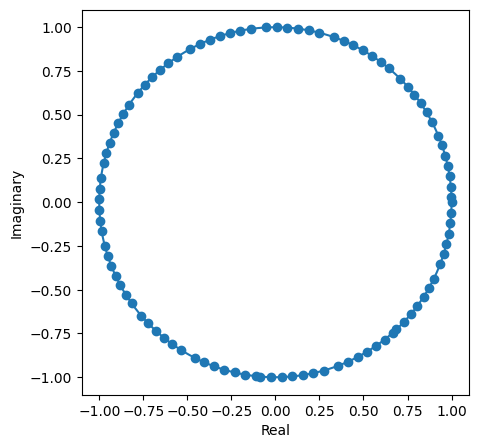

In [10]:
utils.plot_complex_on_unit_circle([np.exp(1j * k * np.sqrt(3) * np.pi) for k in range(100)])